# PCA on Weather Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap

In [27]:
data=pd.read_csv("weatherHistory.csv")

In [28]:
data.columns=["date","summary","preciptype","temp","aptemp","humidity","wspeed","wbear","visibility","loudcover","pressure","dailysum"]


In [29]:
cols=['temp','aptemp','humidity','wspeed','wspeed','wbear','visibility','loudcover','pressure']

In [30]:
data.isnull().sum()

date            0
summary         0
preciptype    517
temp            0
aptemp          0
humidity        0
wspeed          0
wbear           0
visibility      0
loudcover       0
pressure        0
dailysum        0
dtype: int64

In [31]:
data.head()

,date,summary,preciptype,temp,aptemp,humidity,wspeed,wbear,visibility,loudcover,pressure,dailysum
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


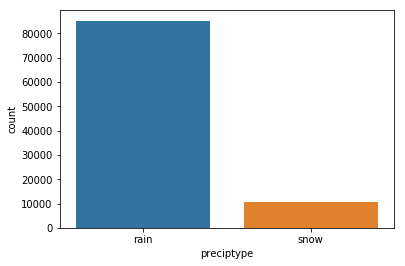

In [32]:
%matplotlib inline
sns.countplot(x = 'preciptype', data = data)


In [33]:
x=data[cols]

In [34]:
import numpy as np
data['preciptype']=np.where(data['preciptype']=="rain",1,0)
y=data['preciptype']
len(y)
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40) 

## Applying KPCA and plotting the result

(array([-6., -4., -2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 10 Text yticklabel objects>)

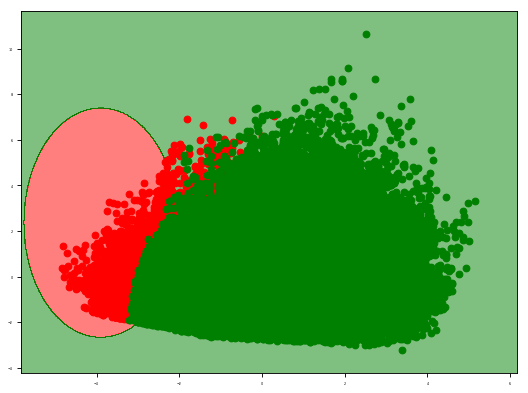

In [96]:
reduction = PCA(n_components=2)
x_train_reduced = reduction.fit_transform(x_train)
x_test_reduced = reduction.transform(x_test)

classifier = GaussianNB()
classifier.fit(x_train_reduced, y_train)

y_pred = classifier.predict(x_test_reduced)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#Boundary Line
X_set, y_set = np.concatenate([x_train_reduced, x_test_reduced], axis = 0), np.concatenate([y_train, y_test], axis = 0)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.xticks(fontsize = 3)
plt.yticks(fontsize = 3)

## Classifier Score 

In [37]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.76      0.60      0.67      4411
          1       0.95      0.98      0.96     34171

avg / total       0.93      0.93      0.93     38582



In [97]:
accuracy_score(y_pred,y_test)

0.9303561246176973

# KPCA 

In [98]:
from sklearn.decomposition import KernelPCA
x=data[cols].iloc[94000:,:]
y=data['preciptype'].iloc[94000:]
len(y)
scaler = StandardScaler()
x = scaler.fit_transform(x)
len(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40) 

(array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 <a list of 9 Text yticklabel objects>)

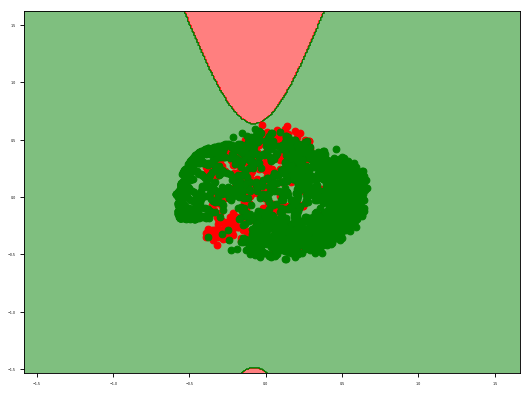

In [99]:
reduction = KernelPCA(n_components=2, kernel = 'rbf')
x_train_reduced = reduction.fit_transform(x_train)
x_test_reduced = reduction.transform(x_test)

classifier = GaussianNB()
classifier.fit(x_train_reduced, y_train)

y_pred = classifier.predict(x_test_reduced)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#Boundary Line
X_set, y_set = np.concatenate([x_train_reduced, x_test_reduced], axis = 0), np.concatenate([y_train, y_test], axis = 0)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.xticks(fontsize = 3)
plt.yticks(fontsize = 3)

In [100]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       161
          1       0.84      1.00      0.91       821

avg / total       0.70      0.84      0.76       982



c:\python\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [101]:
accuracy_score(y_pred,y_test)

0.8360488798370672

# LDA

In [102]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [103]:
x=data[cols]
y=data['preciptype']
len(y)
scaler = StandardScaler()
x = scaler.fit_transform(x)
len(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40) 

In [104]:
reduction = LinearDiscriminantAnalysis(n_components=2)
reduction.fit_transform(x_train,y_train)
x_train_reduced = reduction.transform(x_train)
x_test_reduced = reduction.transform(x_test)

classifier = GaussianNB()
classifier.fit(x_train_reduced, y_train)

y_pred = classifier.predict(x_test_reduced)


c:\python\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [105]:
y_pred = classifier.predict(x_test)

In [106]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.00      0.00      4464
          1       0.88      1.00      0.94     34118

avg / total       0.90      0.88      0.83     38582



In [107]:
from sklearn.metrics import accuracy_score

In [108]:
accuracy_score(y_pred,y_test)

0.8843242963039759